In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import cv2

### Frequency Domain Image Blur Measure (FM)

In [34]:
def get_fm_score(image: np.array):
    f = np.fft.fft2(image)
    fc = np.fft.fftshift(f)
    af = np.abs(fc)
    m = np.max(af)
    threshold = m*0.001 
    th = np.sum(f>threshold)
    N, M = image.shape
    
    return th/(N*M)
    
    # Modulo
    # frec_img = 20*np.log(np.abs(frec_img))
    # plt.imshow(frec_img, cmap='jet')

image = cv2.imread('segmentacion.png', cv2.IMREAD_GRAYSCALE)
fm = get_fm_score(image)
print(fm)        

0.0036943343514613592


In [35]:
matplotlib.use('Agg') 
def convert_to_img(value_list: list, image_shape: tuple, total_frames: int):
    
    fig, ax = plt.subplots(figsize=(image_shape[0]/100, image_shape[1]/100))
    ax.set_xlim(0, total_frames+total_frames*0.1)
    ax.plot(value_list)

    # Convertir el gráfico en un array
    canvas = FigureCanvas(fig)
    canvas.draw()
    plt.close(fig)
    width, height = canvas.get_width_height()
    # Convertir a un array de NumPy 
    image = np.frombuffer(canvas.buffer_rgba(), dtype='uint8').reshape((height, width, 4))
    
    # Remove alplha channel and return
    return image[:,:,:3]
    

# Abre el video
video_path = 'video/focus_video.mov'
captura_video = cv2.VideoCapture(video_path)

fm_score_list = list()

if not captura_video.isOpened():
    print("Error al abrir el archivo de video")
else:
    # Obtén las dimensiones del video
    frame_width = int(captura_video.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(captura_video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(captura_video.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Obtén la tasa de cuadros (frame rate) del video
    fps = int(captura_video.get(cv2.CAP_PROP_FPS))
    #fps = 35
    delay = int(600 / fps)
    
    while True:
        ret, frame = captura_video.read()
        if not ret:
            break
    
        # Obtenemos la medicion    
        fm_score_list.append(get_fm_score(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)))
        
        
        # Combina el frame original y la grafica de la medicion del blur
        img_frame = convert_to_img(fm_score_list, (frame_width, frame_height), total_frames)
        frame_combined = np.hstack((frame, img_frame ))
        # Mostrar el frame combinado
        cv2.imshow('Video', frame_combined)
        
        # Salir del loop si se presiona la tecla 'q'
        if cv2.waitKey(delay) & 0xFF == ord('q'):
            break

# Libera el objeto de captura de video y cierra todas las ventanas
captura_video.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

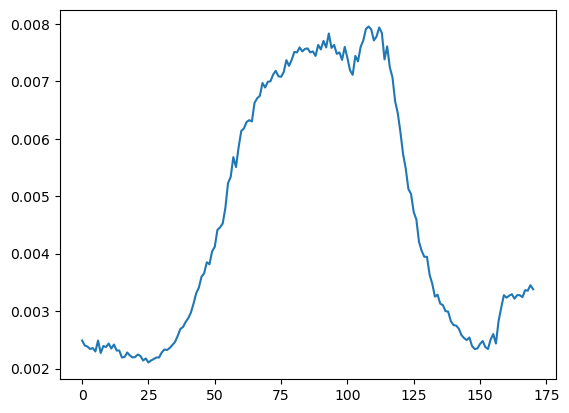

In [29]:
%matplotlib inline
plt.plot(fm_score_list)